<a href="https://colab.research.google.com/github/kailing231/treasurecube/blob/main/TreasureHunt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CZ3005 Lab 2 Reinforcement Learning Code Implementation - Leong Kai Ling U1821434B**

---


below code is from provided **environment.py** and is not modified

In [1]:
import numpy as np
import time
import random

from abc import ABC, abstractmethod


class AbstractEnvironment(ABC):
    def __init__(self):
        self.agent_sign = '+'
        self.goal_sign = 'G'
        self.corridor_sign = '-'

    def render(self):
        raise NotImplemented

    def reset(self):
        raise NotImplemented

    def step(self, action):
        raise NotImplemented

class TreasureCube(AbstractEnvironment):
    def __init__(self, max_step=20):
        super(TreasureCube, self).__init__()
        self.dim = 4
        self.max_step = max_step
        self.curr_pos = [0, 0, 0]  # (z, x, y)
        self.time_step = 0
        self.end_pos = [self.dim - 1, self.dim - 1, self.dim - 1]
        self.visual_state = []
        self.seed = None
        self.set_seed()
        self.all_actions = ['right', 'left', 'up', 'down', 'forward', 'backward']
        self.slip_actions = dict()
        self.set_action_rules()

    def reset(self):
        self.curr_pos = [0, 0, 0]
        self.time_step = 0
        self.end_pos = [self.dim - 1, self.dim - 1, self.dim - 1]
        self._reset_visual_states(self.curr_pos, self.end_pos)
        return ''.join(str(pos) for pos in self.curr_pos)

    def step(self, action, stochastic=True):
        in_action = action  # action from agent
        assert action in self.all_actions
        reward = -0.1
        is_terminate = False
        pre_pos = self.curr_pos
        r = random.random()
        if action == 'right':
            if r < 0.1:
                action = 'up'
            elif r < 0.2:
                action = 'down'
            elif r < 0.3:
                action = 'forward'
            elif r < 0.4:
                action = 'backward'
            else:
                action = 'right'
        elif action == 'left':
            if r < 0.1:
                action = 'up'
            elif r < 0.2:
                action = 'down'
            elif r < 0.3:
                action = 'forward'
            elif r < 0.4:
                action = 'backward'
            else:
                action = 'left'
        elif action == 'up':
            if r < 0.1:
                action = 'left'
            elif r < 0.2:
                action = 'right'
            elif r < 0.3:
                action = 'forward'
            elif r < 0.4:
                action = 'backward'
            else:
                action = 'up'
        elif action == 'down':
            if r < 0.1:
                action = 'left'
            elif r < 0.2:
                action = 'right'
            elif r < 0.3:
                action = 'forward'
            elif r < 0.4:
                action = 'backward'
            else:
                action = 'down'
        elif action == 'forward':
            if r < 0.1:
                action = 'left'
            elif r < 0.2:
                action = 'right'
            elif r < 0.3:
                action = 'up'
            elif r < 0.4:
                action = 'down'
            else:
                action = 'forward'
        else:
            if r < 0.1:
                action = 'left'
            elif r < 0.2:
                action = 'right'
            elif r < 0.3:
                action = 'up'
            elif r < 0.4:
                action = 'down'
            else:
                action = 'backward'

        if not stochastic:
            action = in_action

        assert action in self.all_actions
        if action == 'left':
            if self.curr_pos[1] == 0:  # wall
                pass
            else:
                self.curr_pos[1] -= 1
        elif action == 'right':
            if self.curr_pos[1] == self.dim - 1:  # wall
                pass
            elif self.curr_pos[1] == self.dim - 2 and self.curr_pos[0] == self.dim - 1 and self.curr_pos[
                2] == self.dim - 1:
                self.curr_pos[1] += 1
                is_terminate = True
                reward = 1
            else:
                self.curr_pos[1] += 1

        elif action == 'forward':
            if self.curr_pos[0] == self.dim - 1:  # wall
                pass
            elif self.curr_pos[0] == self.dim - 2 and self.curr_pos[1] == self.dim - 1 and self.curr_pos[
                2] == self.dim - 1:
                self.curr_pos[0] += 1
                is_terminate = True
                reward = 1
            else:
                self.curr_pos[0] += 1
        elif action == 'backward':
            if self.curr_pos[0] == 0:  # wall
                pass
            else:
                self.curr_pos[0] -= 1

        elif action == 'up':
            if self.curr_pos[2] == self.dim - 1:  # wall
                pass
            elif self.curr_pos[2] == self.dim - 2 and self.curr_pos[0] == self.dim - 1 and self.curr_pos[
                1] == self.dim - 1:
                self.curr_pos[2] += 1
                is_terminate = True
                reward = 1
            else:
                self.curr_pos[2] += 1
        elif action == 'down':
            if self.curr_pos[2] == 0:
                pass
            else:
                self.curr_pos[2] -= 1

        assert action in self.all_actions
        self.time_step += 1
        if self.time_step == self.max_step - 1:
            is_terminate = True

        self._reset_visual_states(self.curr_pos, self.end_pos)
        return reward, is_terminate, ''.join(str(pos) for pos in self.curr_pos)

    def render(self):
        print(' '.join(['*'] * self.dim))
        for i in range(self.dim):
            for line in self.visual_state[i]:
                print(' '.join(line))
            print(' '.join(['#'] * self.dim))
        print(' '.join(['*'] * self.dim))

    def set_seed(self, seed=10086):
        self.seed = seed
        random.seed(seed)

    def _reset_visual_states(self, agent_pos, goal_pos):
        self.visual_state = [[[self.corridor_sign] * self.dim for _ in range(self.dim)] for _ in range(self.dim)]
        self.visual_state[agent_pos[0]][agent_pos[1]][agent_pos[2]] = self.agent_sign
        self.visual_state[goal_pos[0]][goal_pos[1]][goal_pos[2]] = self.goal_sign

    def set_action_rules(self):
        self.slip_actions['right'] = ['up', 'down', 'forward', 'backward', 'right']
        self.slip_actions['left'] = ['up', 'down', 'forward', 'backward', 'left']
        self.slip_actions['up'] = ['left', 'right', 'forward', 'backward', 'up']
        self.slip_actions['down'] = ['left', 'right', 'forward', 'backward', 'down']
        self.slip_actions['forward'] = ['left', 'right', 'up', 'down', 'forward']
        self.slip_actions['backward'] = ['left', 'right', 'up', 'down', 'backward']



---

below code is from provided **test.py** and is split into different sections

In [2]:
import argparse
import random

import pandas as pd # added for DataFrame

In [3]:
class RandomAgent(object):
    def __init__(self):
        self.action_space = ['left','right','forward','backward','up','down'] # in TreasureCube
        # initialise Q-table 
        length = 4 # coordinates range = [0,3]
        indexnames = []
        for x in range(length):
            for y in range(length):
                for z in range(length):
                  indexnames.append(str(x) + str(y) + str(z))
        # initialise all value = 0
        self.Q = pd.DataFrame(0, index=indexnames, columns=self.action_space)
        
    def take_action(self, state):
      epsilon = 0.01
      if random.uniform(0, 1) < epsilon:
          action = random.choice(self.action_space) # choose random action
      else:
          action = self.Q.loc[state].idxmax() # or choose highest action
      return action

    def train(self, state, action, next_state, reward):
      alpha = 0.5 # learning rate
      gamma = 0.99 # discount factor

      old_value = self.Q.loc[state, action] # old Q(s,a)
      next_max = self.Q.loc[next_state].max() # max of Q(s',a)
      # store new Q(s,a) = old Q(s,a) + alpha * (reward + gamma*(max of Q(s',a)) - old Q(s,a))
      new_value = old_value + alpha * (reward + (gamma * next_max) - old_value)
      self.Q.loc[state, action] = new_value # new Q(s,a)

    # test agent after q table is populated
    def test_agent(self, max_step=100): # TODO
      self.max_step = max_step



---

Below is the code from provided **test_cube()** in **test.py**
<br> Create the environment and agent. Run the agent to populate the Q-table with multiple episodes and multiple steps.
<br> In addition, added DataFrame to track episode reward per episode.
<br> max_episode = 500 and max_step = 500, starts at 0 and ends at 499

In [4]:
max_episode = 500
max_step = 500

# added to keep track of episode reward per episode
df_ep_reward = pd.DataFrame(0, index=range(0,max_episode), columns=["reward"])

env = TreasureCube(max_step=max_step)
agent = RandomAgent()

for epsisode_num in range(0, max_episode):
    state = env.reset()
    terminate = False
    t = 0
    episode_reward = 0

    while not terminate:        
        action = agent.take_action(state) # choose a random action or highest action

        reward, terminate, next_state = env.step(action)
        episode_reward += reward

        # you can comment the following two lines, if the output is too much
        # env.render() # comment
        # print(f'step: {t}, action: {action}, reward: {reward}') # comment

        t += 1
        agent.train(state, action, next_state, reward) # implemented Q-Learning
        state = next_state
    print(f'epsisode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
    # added to store episode reward per episode
    df_ep_reward.loc[epsisode_num] = episode_reward

epsisode: 0, total_steps: 54 episode reward: -4.299999999999997
epsisode: 1, total_steps: 187 episode reward: -17.599999999999994
epsisode: 2, total_steps: 69 episode reward: -5.799999999999992
epsisode: 3, total_steps: 113 episode reward: -10.199999999999976
epsisode: 4, total_steps: 92 episode reward: -8.099999999999984
epsisode: 5, total_steps: 28 episode reward: -1.700000000000001
epsisode: 6, total_steps: 32 episode reward: -2.1000000000000014
epsisode: 7, total_steps: 163 episode reward: -15.19999999999996
epsisode: 8, total_steps: 233 episode reward: -22.20000000000006
epsisode: 9, total_steps: 21 episode reward: -1.0000000000000004
epsisode: 10, total_steps: 30 episode reward: -1.9000000000000012
epsisode: 11, total_steps: 19 episode reward: -0.8000000000000005
epsisode: 12, total_steps: 24 episode reward: -1.3000000000000007
epsisode: 13, total_steps: 37 episode reward: -2.600000000000002
epsisode: 14, total_steps: 32 episode reward: -2.1000000000000014
epsisode: 15, total_ste



---


plot the learning progress: episode rewards vs. episodes

In [5]:
df_ep_reward

,reward
0,-4.300000e+00
1,-1.760000e+01
2,-5.800000e+00
3,-1.020000e+01
4,-8.100000e+00
...,...
495,2.000000e-01
496,-7.000000e-01
497,1.110223e-16
498,-1.000000e-01


In [8]:
import matplotlib.pyplot as plt 

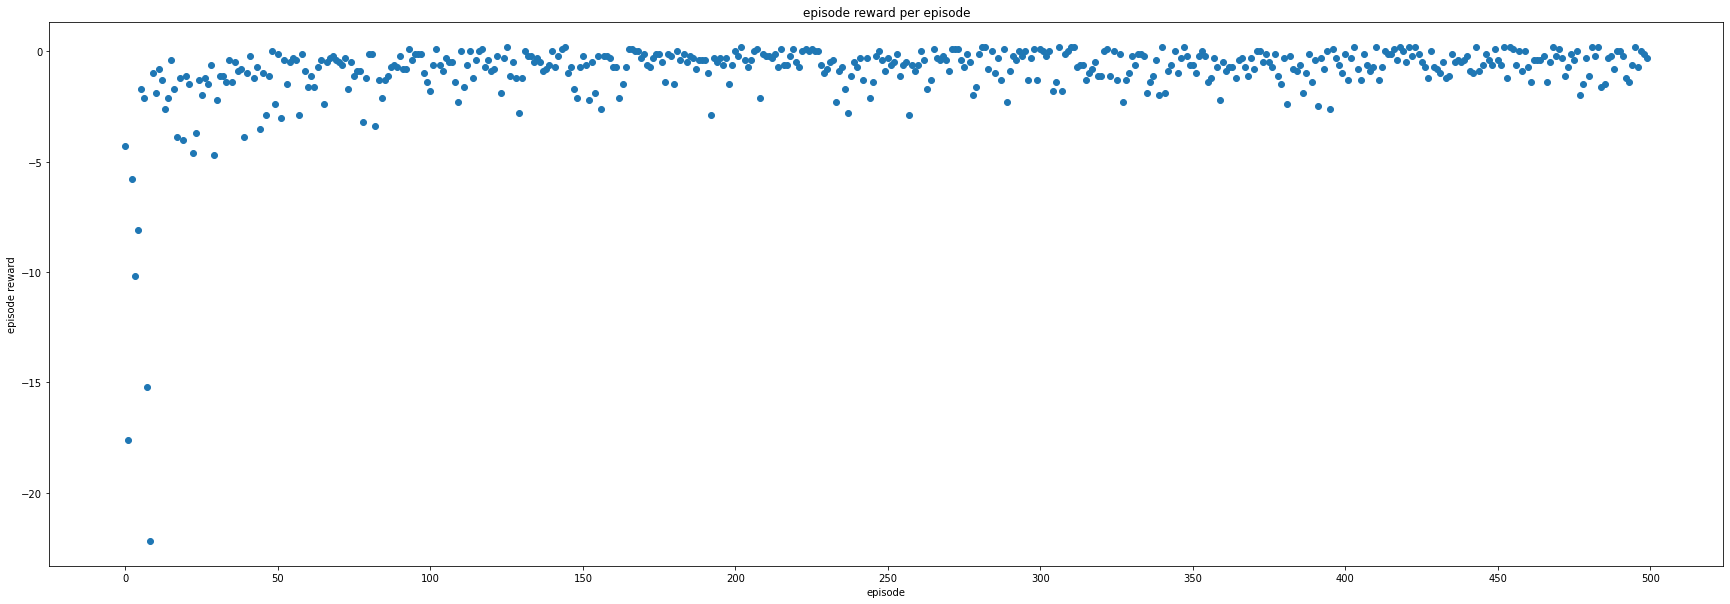

In [36]:
plt.figure(figsize=(30,10))

plt.plot(df_ep_reward, "o") # todo scatter plot
# plt.plot(df_ep_reward) 

plt.xlabel('episode') # x-axis label
plt.ylabel('episode reward') # y-axis label
plt.title('episode reward per episode') # plot title
plt.xticks(np.arange(0, 501, step=50)) # x-axis step = 50
  
plt.show()



---


test populated Q-table

In [ ]:
max_episode = 100
avg_steps = 0
# test agent with populated q table
for epsisode_num in range(0, max_episode):
    state = env.reset()
    terminate = False
    t = 0
    episode_reward = 0

    while not terminate:        
        action = agent.take_action(state) # choose a random action or highest action

        reward, terminate, next_state = env.step(action)
        episode_reward += reward
        t += 1
        # agent.train(state, action, next_state, reward)
        state = next_state
    print(f'epsisode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
    # compute avg steps
    avg_steps += t

# end of loop
print("Averge steps of agent per episode = ", avg_steps/max_episode)

In [ ]:
# agent.Q.to_csv(r'q_table_2.csv')

In [ ]:
agent.Q